In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import integrate
from random import randint, seed
from re import L

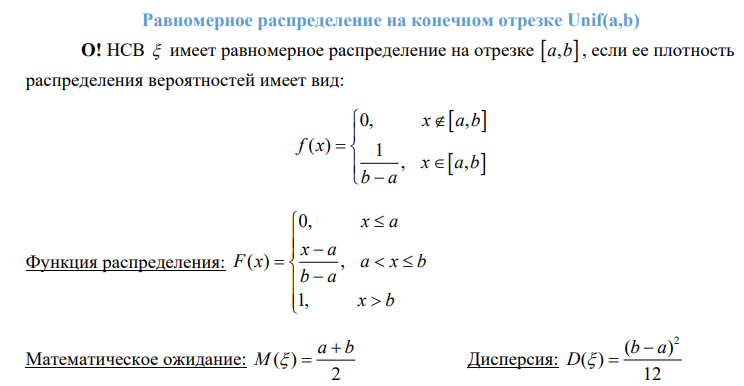

**Полумарковский процесс**


1. Задаем элементы Pkv матрицы переходов за один шаг P

In [2]:
p = 310 + 100*np.random.randn(30,30)

sums = list()
for i in range(0,30):
  sums.append(sum(p[i]))

for i in range(0,30):
  for j in range(0,30):
    p[i,j] = p[i,j]/sums[i]

In [3]:
P = pd.DataFrame(p)
P

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.036267,0.027069,0.029389,0.024835,0.024232,0.043900,0.039238,0.036583,0.030559,0.039607,...,0.043347,0.050592,0.050477,0.024986,0.035774,0.025609,0.022851,0.043820,0.018850,0.034895
1,0.028608,0.026062,0.036401,0.036456,0.034822,0.044771,0.019508,0.034192,0.005471,0.031615,...,0.054664,0.043888,0.013508,0.046015,0.029911,0.017692,0.037849,0.036153,0.028455,0.026371
2,0.031520,0.027340,0.037763,0.048252,0.025113,0.031606,0.036182,0.027125,0.034862,0.038076,...,0.016475,0.026356,0.033859,0.039243,0.047628,0.049923,0.043152,0.039437,0.049006,0.033791
3,0.055505,0.040705,0.022063,0.020721,0.021739,0.043722,0.028239,0.023300,0.040790,0.017803,...,0.023197,0.030041,0.051522,0.038695,0.029427,0.025886,0.021618,0.043622,0.021680,0.041461
4,0.022275,0.015300,0.037623,0.019504,0.033181,0.039784,0.031714,0.029746,0.036671,0.029819,...,0.039569,0.032041,0.032253,0.028630,0.059386,0.039581,0.015508,0.021893,0.045868,0.008654
5,0.014137,0.015468,0.034617,0.016762,0.053408,0.034250,0.047133,0.028742,0.035353,0.037215,...,0.034827,0.034272,0.042838,0.039001,0.040467,0.043376,0.034771,0.027052,0.045627,0.037762
6,0.025102,0.023794,0.058131,0.037578,0.025295,0.018617,0.057553,0.021116,0.036809,0.050467,...,0.053863,0.032913,0.024628,0.032936,0.037203,0.034374,0.021236,0.039107,0.027808,0.033863
7,0.038186,0.027704,0.037893,0.045870,0.025503,0.024137,0.031519,0.022327,0.034667,0.026693,...,0.036757,0.031257,0.048477,0.032973,0.032135,0.040183,0.021249,0.031295,0.039896,0.021019
8,0.056808,0.040177,0.031037,0.027778,0.032223,0.050788,0.026592,0.022429,0.043902,0.041565,...,0.041895,0.026360,0.041548,0.019226,0.022471,0.033428,0.024533,0.030271,0.033288,0.026844
9,0.036347,0.017165,0.043798,0.027240,0.011478,0.042405,0.018036,0.025697,0.032670,0.027690,...,0.041016,0.046182,0.047906,0.024773,0.039169,0.022092,0.040919,0.030400,0.033857,0.043985


2. Задаем параметры распределения, зависимые от k и ν

In [5]:
a = np.zeros((30,30))
b = np.zeros((30,30))
for i in range(0,30):
  for j in range(0,30):
    a[i,j] = np.random.randint(900)
    b[i,j] = np.random.randint(low = 1000, high = 1900)

In [6]:
A = pd.DataFrame(a)
A

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,490.0,285.0,12.0,767.0,693.0,415.0,467.0,504.0,605.0,738.0,...,458.0,499.0,449.0,207.0,679.0,75.0,815.0,90.0,745.0,213.0
1,487.0,209.0,333.0,13.0,303.0,112.0,60.0,275.0,356.0,413.0,...,110.0,230.0,635.0,338.0,129.0,806.0,762.0,270.0,499.0,747.0
2,591.0,594.0,443.0,737.0,158.0,641.0,849.0,18.0,180.0,606.0,...,559.0,224.0,188.0,823.0,556.0,816.0,96.0,636.0,37.0,179.0
3,825.0,86.0,618.0,228.0,538.0,639.0,610.0,20.0,421.0,541.0,...,809.0,6.0,378.0,341.0,686.0,15.0,767.0,76.0,449.0,650.0
4,33.0,613.0,671.0,509.0,448.0,634.0,789.0,239.0,36.0,125.0,...,508.0,83.0,159.0,428.0,562.0,650.0,289.0,444.0,841.0,834.0
5,122.0,724.0,41.0,82.0,408.0,334.0,402.0,637.0,60.0,625.0,...,494.0,567.0,464.0,580.0,360.0,106.0,173.0,207.0,839.0,848.0
6,443.0,426.0,841.0,886.0,469.0,28.0,305.0,383.0,759.0,58.0,...,182.0,205.0,405.0,830.0,751.0,480.0,553.0,604.0,422.0,241.0
7,622.0,123.0,466.0,227.0,182.0,442.0,693.0,358.0,724.0,787.0,...,600.0,361.0,447.0,222.0,408.0,334.0,233.0,600.0,150.0,812.0
8,480.0,385.0,391.0,562.0,560.0,692.0,389.0,368.0,763.0,246.0,...,260.0,330.0,548.0,289.0,243.0,839.0,282.0,313.0,233.0,197.0
9,134.0,612.0,737.0,160.0,835.0,29.0,542.0,369.0,421.0,300.0,...,508.0,652.0,764.0,425.0,339.0,85.0,334.0,198.0,240.0,98.0


In [7]:
B = pd.DataFrame(b)
B

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1385.0,1138.0,1131.0,1424.0,1699.0,1265.0,1387.0,1256.0,1765.0,1044.0,...,1744.0,1117.0,1328.0,1653.0,1601.0,1299.0,1625.0,1532.0,1744.0,1070.0
1,1404.0,1261.0,1378.0,1591.0,1437.0,1436.0,1584.0,1074.0,1025.0,1237.0,...,1506.0,1563.0,1109.0,1260.0,1150.0,1018.0,1026.0,1189.0,1191.0,1317.0
2,1606.0,1380.0,1431.0,1445.0,1027.0,1380.0,1283.0,1519.0,1475.0,1164.0,...,1618.0,1734.0,1558.0,1115.0,1108.0,1661.0,1148.0,1572.0,1092.0,1159.0
3,1896.0,1233.0,1740.0,1124.0,1594.0,1164.0,1621.0,1068.0,1869.0,1670.0,...,1276.0,1503.0,1877.0,1261.0,1231.0,1207.0,1536.0,1876.0,1518.0,1749.0
4,1444.0,1531.0,1883.0,1811.0,1117.0,1579.0,1261.0,1583.0,1317.0,1494.0,...,1159.0,1641.0,1684.0,1053.0,1838.0,1338.0,1438.0,1412.0,1047.0,1208.0
5,1878.0,1286.0,1422.0,1475.0,1696.0,1378.0,1144.0,1247.0,1688.0,1777.0,...,1321.0,1049.0,1612.0,1294.0,1291.0,1657.0,1849.0,1535.0,1343.0,1595.0
6,1715.0,1234.0,1419.0,1738.0,1304.0,1754.0,1662.0,1456.0,1864.0,1575.0,...,1055.0,1144.0,1526.0,1693.0,1607.0,1307.0,1193.0,1500.0,1637.0,1610.0
7,1666.0,1559.0,1532.0,1445.0,1480.0,1385.0,1479.0,1212.0,1276.0,1448.0,...,1195.0,1179.0,1304.0,1270.0,1094.0,1205.0,1196.0,1329.0,1038.0,1851.0
8,1544.0,1826.0,1848.0,1785.0,1601.0,1316.0,1023.0,1805.0,1252.0,1054.0,...,1570.0,1032.0,1586.0,1705.0,1040.0,1838.0,1324.0,1055.0,1481.0,1421.0
9,1670.0,1033.0,1120.0,1780.0,1656.0,1882.0,1400.0,1778.0,1402.0,1611.0,...,1689.0,1242.0,1711.0,1312.0,1524.0,1340.0,1856.0,1426.0,1722.0,1808.0


3. Задаем элементы Gkv матрицы условных ФР G(x)


In [9]:
x = 1200
G = np.zeros((30,30))
for i in range(0,30):
  for j in range(0,30):
    G[i,j] = (x-a[i,j])/(b[i,j]-a[i,j])

In [ ]:
Gx = pd.DataFrame(G)
Gx

4. Вычисляем матрицу A(x), определяющую ФР времени пребывания k(t) в состоянии k

In [ ]:
A = np.zeros((30,30))
for i in range(0,30):
  for j in range(0,30):
    A[i,j] = p[i,j]*G[i,j]

In [ ]:
Ax = pd.DataFrame(A)
Ax

**Исследование двумерного полумарковского процесса {k(t),l(t)} методом остаточного времени z(t)**

1. Стационарные распределения вероятностей r(k) состояний вложенной ЦМ ξ(n)

In [11]:
pt = np.transpose(p)
for i in range(0,30):
  for j in range(0,30):
    if i==j:
      pt[i,j] = p[i,j]-1

for i in range(0,30):
  pt[29,i] = 1

rk = np.full((30,1), 0)
rk[29,0]=1

Pk = np.linalg.inv(pt)
r = Pk.dot(rk)
print(r)
print('Условия нормировки: Сумма по всем Pk =', np.sum(r))

[[0.03198826]
 [0.03449696]
 [0.03462287]
 [0.02992073]
 [0.03343792]
 [0.03696452]
 [0.03591198]
 [0.02782114]
 [0.0320562 ]
 [0.03561312]
 [0.03537938]
 [0.03382211]
 [0.03053603]
 [0.03194282]
 [0.03106144]
 [0.0314614 ]
 [0.03166484]
 [0.03754674]
 [0.03337081]
 [0.03303531]
 [0.03638846]
 [0.03413146]
 [0.03490076]
 [0.03165052]
 [0.03735012]
 [0.03570216]
 [0.0290043 ]
 [0.03226483]
 [0.03449291]
 [0.03145992]]
Условия нормировки: Сумма по всем Pk = 1.0


2. Матрица средних значений времени пребывания в состоянии k

In [22]:
ak = np.zeros((30,30))
for i in range(0,30):
  for j in range(0,30):
    ak[i,j] = (a[i,j]+b[i,j])/2

In [ ]:
ak_ = pd.DataFrame(ak)
ak_

3. Матрица величин, определяемых равенством:

      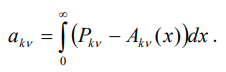

In [134]:
# Что-то с чем-то
x = 1200
akv = np.zeros((30,30))
for i in range(0,30):
  for j in range(0,30):
    akv[i,j] = (a[i,j]+b[i,j])/2 + p[i,j] - x

4. Стационарное распределение вероятностей P(k) значений полумарковского процесса k(t) имеет вид

In [ ]:
for i in range(0,30):
  P1k = (r[i]*ak[i])/(np.sum(r[i]*ak[i]))
P1k

5. Стационарное распределение вероятностей P(ν) значений полумарковского процесса l(t) имеет вид

In [ ]:
# Что-то с чем-то
P2v = np.zeros((30,1))
for i in range(0,30):
  P2v[i] = (np.sum(r[i]*akv[i]))/(np.sum(r[i]*ak[i]))

sums = 0
for i in range(0,30):
  sums = sums + abs(P2v[i])

for i in range(0,30):
  P2v[i] = abs(P2v[i])
  P2v[i] = P2v[i]/sums

P2v

6. Графики

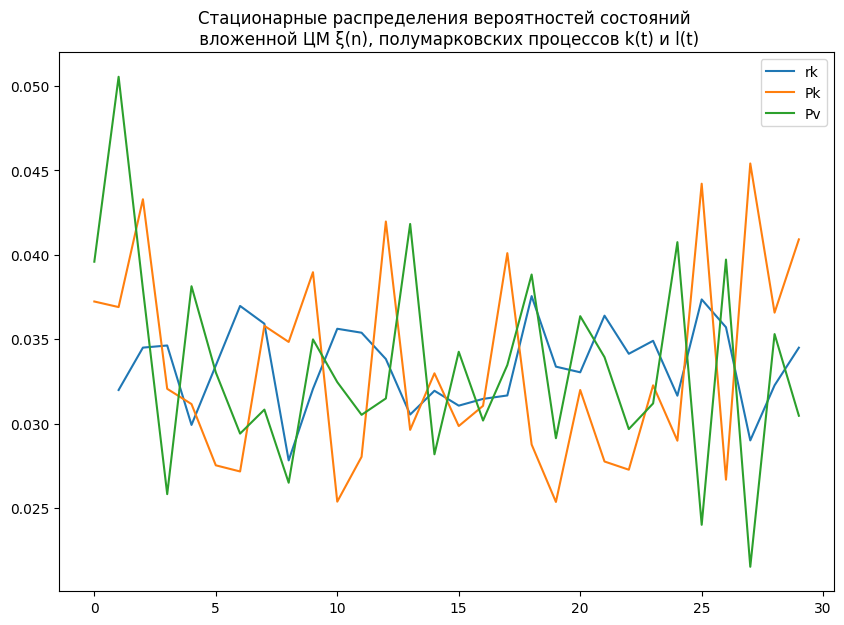

In [133]:
x = np.arange(1, 30, 1)
fig = plt.figure(figsize=(10,7))
plt.plot(x,r[x-1])
plt.plot(P1k)
plt.plot(P2v)
#plt.plot(P2v)
plt.title('Стационарные распределения вероятностей состояний \n вложенной ЦМ ξ(n), полумарковских процессов k(t) и l(t)')
plt.legend(['rk','Pk','Pv'])
plt.show()